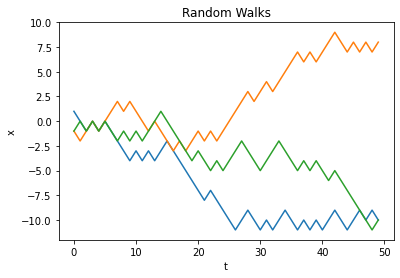

In [92]:
import numpy as np
import matplotlib.pyplot as p

def montecarlo(T):
    dx = 1
    x0 = 0 
    traj = np.zeros(T)
    for t in range(T):
        x0 += np.random.choice(np.array([-1,1]))
        traj[t] = x0
    return traj
for i in range(3):
    arr = montecarlo(50)
    p.plot(arr)
p.title('Random Walks')
p.xlabel('t')
p.ylabel('x')
p.savefig('randomwalk.eps', format = 'eps')
p.show()

In [116]:

def montecarlo2(t,N):
    x1 = np.random.choice(np.array([-1,1]),[N,t]).sum(axis = 1)
    return x1

def P(x,t):
    return np.exp(-0.5*xx**2/T)/np.sqrt(2*np.pi*T)

def P1(x,t):
    return np.exp(-0.5*x**2/T)/np.sqrt(2*np.pi*T)

T = 40


Norm: 1.0
med: -0.0053200000000002134
x2: 40.40812
#-------------------------------#


T = 400


Norm: 1.0
med: 0.00910799999999945
x2: 401.029036
#-------------------------------#


T = 4000


Norm: 1.0
med: -0.05968209076597475
x2: 3935.596216014838
#-------------------------------#




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


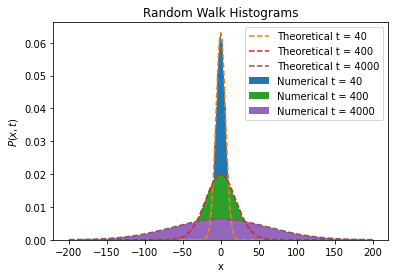

In [118]:
i = 0
binada = np.arange(-200.5,201)
xx = np.arange(-200,201)
num = 5*10**np.array([5,5,5])
for T in [40,400,4000]:
    N = num[i]
    dados11 = montecarlo2(T,N)
    dados21 = montecarlo2(T+1,N)
    bination = p.hist(np.concatenate([dados21,dados11]),bins = binada,density = True,label = 'Numerical t = ' + str(T))
    p.plot(xx,P(xx,T),'--',label = 'Theoretical t = ' + str(T))
    print('T = '+str(T))
    print('\n')
    print('Norm: '+str(bination[0].sum()))
    print('med: '+str((xx*bination[0]).sum()) )
    print('x2: '+str((xx**2*bination[0]).sum()) )
    print('#-------------------------------#')
    print('\n')
    i+=1
    
p.title('Random Walk Histograms')
p.xlabel('x')
p.ylabel(r'$P(x,t)$')
p.legend()
p.savefig('nodrift.eps',format = 'eps')
p.show()
    
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


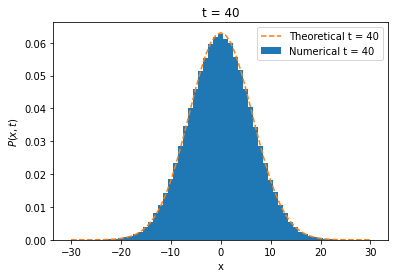

In [123]:
i = 0
binada = np.arange(-200.5,201)

binbin=[np.arange(-30.5,31),np.arange(-100.5,101),np.arange(-250.5,251)]
arra = [np.arange(-30,31),np.arange(-100,101),np.arange(-250,251)]
for T in [40]:
    N = 500000
    dados11 = montecarlo2(T,N)
    dados21 = montecarlo2(T+1,N)
    bination = p.hist(np.concatenate([dados21,dados11]),bins = binbin[i],density = True,label = 'Numerical t = ' + str(T))
    p.plot(arra[i],P1(arra[i],T),'--',label = 'Theoretical t = ' + str(T))
    
    p.title('t = '+str(T))
    p.xlabel('x')
    p.ylabel(r'$P(x,t)$')
    p.legend()
    p.savefig('nodrift'+str(T)+'.eps',format = 'eps')
    p.show()
    i+=1

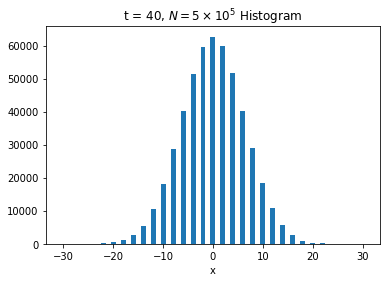

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


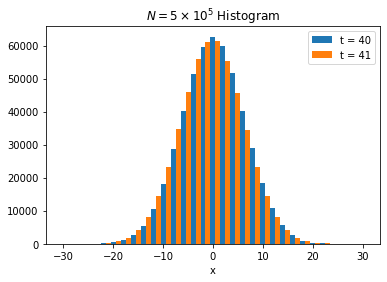

In [100]:
N = 500000
T = 40
dados11 = montecarlo2(T,N)
dados21 = montecarlo2(T+1,N)

binada = np.arange(-30.5,31)
xx = np.arange(-30,31)
bins1 = p.hist(dados11,bins = binada)
p.title(r't = 40, $N = 5\times 10^5$ Histogram')
p.xlabel('x')
p.savefig('evenhist.eps', format = 'eps')
p.show()

bins1 = p.hist(dados11,bins = binada,label = 't = 40')
bins2 = p.hist(dados21,bins = binada,label = 't = 41')
p.legend()
p.title(r'$N = 5\times 10^5$ Histogram')
p.xlabel('x')
p.savefig('evenoddhist.eps', format = 'eps')
p.show()




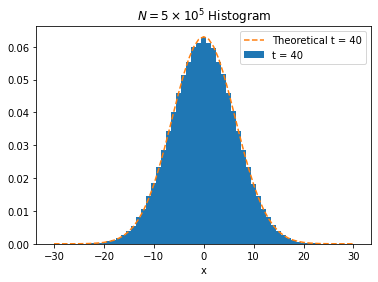

In [106]:
N = 500000
T = 40
dados11 = montecarlo2(T,N)
dados21 = montecarlo2(T+1,N)

binada = np.arange(-30.5,31)
xx = np.arange(-30,31)
p.hist(np.concatenate([dados11,dados21]),bins = binada,label = 't = 40',density = True)
p.plot(xx,P(xx,T),'--',label = 'Theoretical t = ' + str(T))
p.legend()
p.title(r'$N = 5\times 10^5$ Histogram')
p.xlabel('x')
p.show()

# fernandices

In [5]:
N = 500000
T = 400
dados12 = montecarlo2(T,N)
dados22 = montecarlo2(T+1,N)

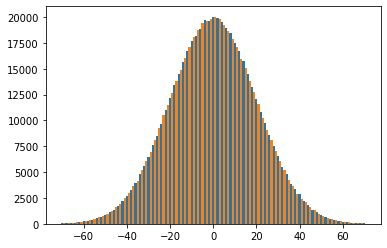

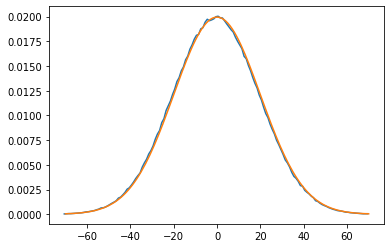

In [6]:
binada = np.arange(-70.5,71)
xx = np.arange(-70,71)
bins1 = p.hist(dados12,bins = binada)
bins2 = p.hist(dados22,bins = binada)
p.show()
p.plot(binada[:-1],(bins1[0]+bins2[0])/2/N)
p.plot(xx,(P(xx,T)+P(xx,T+1))/2)
p.show()

In [7]:
N = 50000
T = 4000
dados13 = montecarlo2(T,N)
dados23 = montecarlo2(T+1,N)

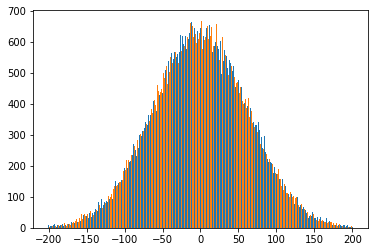

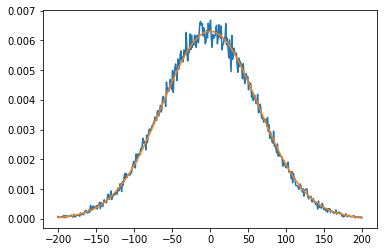

In [8]:
binada = np.arange(-200.5,201)
xx = np.arange(-200,201)
bins1 = p.hist(dados13,bins = binada)
bins2 = p.hist(dados23,bins = binada)
p.show()
p.plot(binada[:-1],(bins1[0]+bins2[0])/2/N)
p.plot(xx,(P(xx,T)+P(xx,T+1))/2)
p.show()

# Com drift

In [121]:
delta = 0.015

def montecarlodrift(t,N):
    x1 = np.random.choice(np.array([-1,1]),[N,t],p=[0.5-delta,0.5+delta]).sum(axis = 1)
    return x1

def Pd(x,t):
    return np.exp(-0.5*(xx-2*T*delta)**2/T)/np.sqrt(2*np.pi*T)

def Pd1(x,t):
    return np.exp(-0.5*(x-2*T*delta)**2/T)/np.sqrt(2*np.pi*T)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


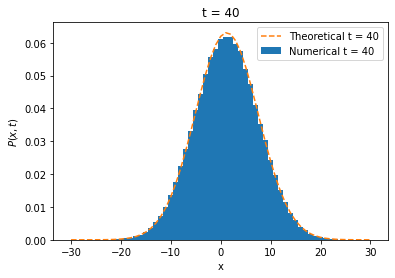

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


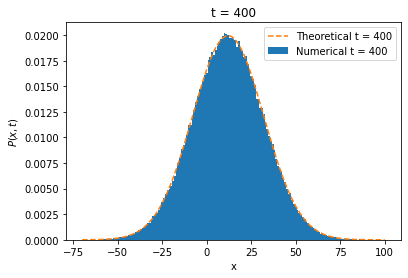

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


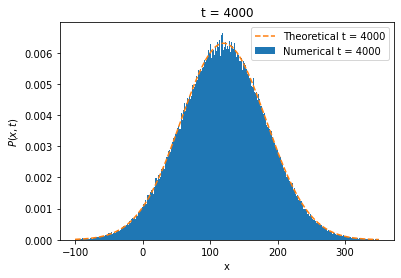

In [122]:
i = 0
binada = np.arange(-200.5,201)

binbin=[np.arange(-30.5,31),np.arange(-70.5,101),np.arange(-100.5,351)]
arra = [np.arange(-30,31),np.arange(-70,101),np.arange(-100,351)]
for T in [40,400,4000]:
    N = 150000
    dados11 = montecarlodrift(T,N)
    dados21 = montecarlodrift(T+1,N)
    bination = p.hist(np.concatenate([dados21,dados11]),bins = binbin[i],density = True,label = 'Numerical t = ' + str(T))
    p.plot(arra[i],Pd1(arra[i],T),'--',label = 'Theoretical t = ' + str(T))
    
    p.title('t = '+str(T))
    p.xlabel('x')
    p.ylabel(r'$P(x,t)$')
    p.legend()
    p.savefig('drift'+str(T)+'.eps',format = 'eps')
    p.show()
    i+=1

T = 40


Norm: 1.0
med: 0.019186666666666463
x2: 40.537152000000006
#-------------------------------#


T = 400


Norm: 1.0
med: 0.016033333333333566
x2: 399.92744
#-------------------------------#


T = 4000


Norm: 1.0
med: 0.004234829639802484
x2: 4005.1969362508084
#-------------------------------#




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


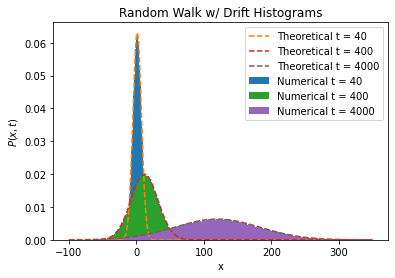

In [102]:
i = 0
binada = np.arange(-100.5,351)
xx = np.arange(-100,351)
for T in [40,400,4000]:
    N = 150000
    dados11 = montecarlodrift(T,N)
    dados21 = montecarlodrift(T+1,N)
    bination = p.hist(np.concatenate([dados21,dados11]),bins = binada,density = True,label = 'Numerical t = ' + str(T))
    p.plot(xx,(Pd(xx,T)),'--',label = 'Theoretical t = ' + str(T))
    print('T = '+str(T))
    print('\n')
    print('Norm: '+str(bination[0].sum()))
    print('med: '+str(((xx-2*T*delta)*bination[0]).sum()) )
    print('x2: '+str(((xx-2*T*delta)**2*bination[0]).sum()) )
    print('#-------------------------------#')
    print('\n')
    i+=1
p.title('Random Walk w/ Drift Histograms')
p.xlabel('x')
p.ylabel(r'$P(x,t)$')
p.legend()
p.savefig('drift.eps',format = 'eps')
p.show()

# mais fernandices


In [27]:
N = 500000
T = 40
dados3 = montecarlodrift(T,N)
dados4 = montecarlodrift(T+1,N)

[-30.5 -29.5 -28.5 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5
 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5
  -6.5  -5.5  -4.5  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5
   5.5   6.5   7.5   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5  16.5
  17.5  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5  28.5
  29.5  30.5]


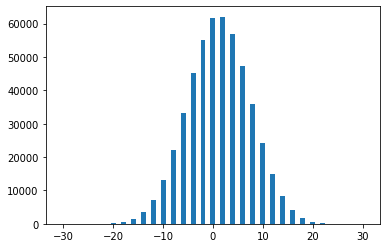

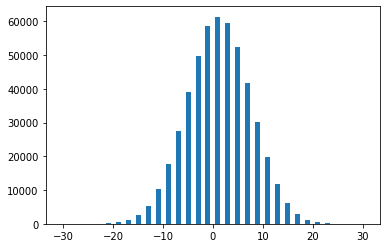

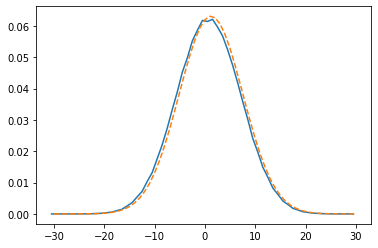

In [30]:
binada = np.arange(-30.5,31,1)
print(binada)
xx = np.arange(-30,31)
bins1 = p.hist(dados3,bins = binada)
p.show()
bins2 = p.hist(dados4,bins = binada)
p.show()
p.plot(binada[:-1],(bins1[0]+bins2[0])/2/N)
p.plot(xx,(Pd(xx,T)+Pd(xx,T+1))/2,'--')
p.show()

In [58]:
N = 500000
T = 400
dados1 = montecarlodrift(T,N)
dados2 = montecarlodrift(T+1,N)

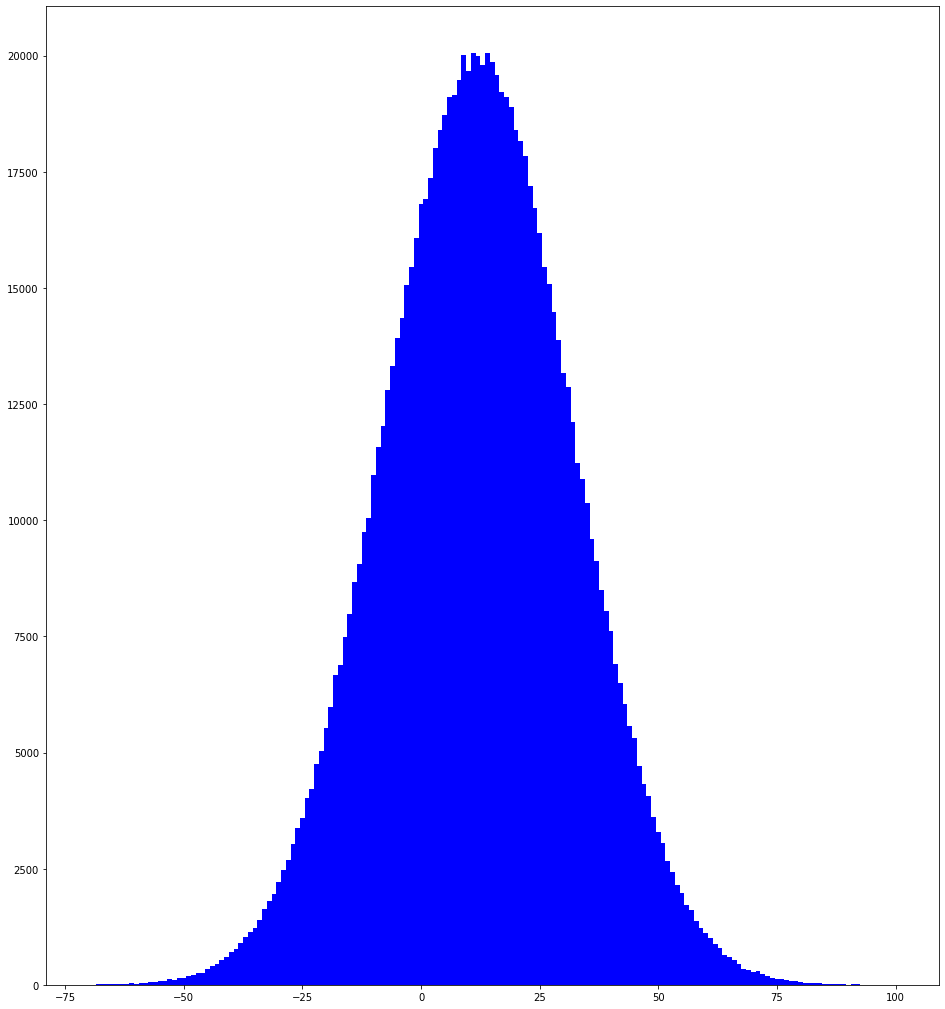

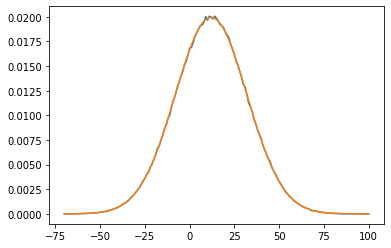

In [60]:

binada = np.arange(-70.5,100.5+1)
xx = np.arange(-70,101)
fig = p.figure(figsize=(16,18))
bins1 = p.hist(dados1,bins = binada,color = 'blue')
bins2 = p.hist(dados2,bins = binada,color = 'blue')
p.show()
p.plot(xx,(bins1[0]+bins2[0])/2/N)
p.plot(xx,(Pd(xx,T)+Pd(xx,T+1))/2)
p.show()

print()

In [49]:
N = 50000
T = 4000
dados5 = montecarlodrift(T,N)
dados6 = montecarlodrift(T+1,N)

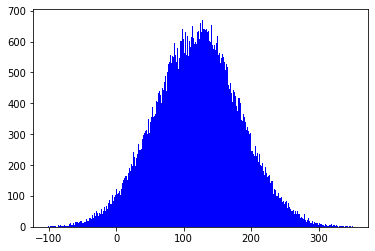

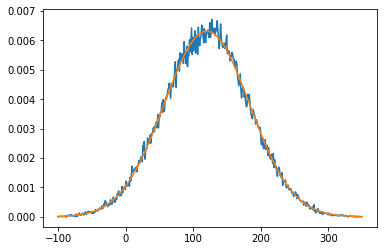

In [53]:
binada = np.arange(-100.5,351)
xx = np.arange(-100,351)
bins1 = p.hist(dados5,bins = binada,color = 'blue')
bins2 = p.hist(dados6,bins = binada,color = 'blue')
p.show()
p.plot(binada[:-1],(bins1[0]+bins2[0])/2/N)
p.plot(xx,(Pd(xx,T)+Pd(xx,T+1))/2)
p.show()